# ECON 220 - Data Science for Economists
## Week 11 - Hypothesis Testing
### Instructor: Jafet Baca-Obando

## Step 1. Import required packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
path = os.getcwd()

## Step 2. Load the dataset

Today, the goal is to cover many types of statistical tests. 

We will use a dataset most people will be familiar with in the realm of economics and that you will likely revisit in ECON 320. 

The Current Population Survey (CPS) is a monthly survey of about 57,000 U.S. households conducted by the Bureau of the Census of the Bureau of Labor Statistics. 

We will use the version in Bruce Hansen's Textbook.

In [15]:
data = pd.read_csv("cps09mar.csv")
data.head(20)
# data.info()

,age,female,hisp,education,earnings,hours,week,union,uncov,region,race,marital
0,52,0,0,12,146000,45,52,0,0,1,1,1
1,38,0,0,18,50000,45,52,0,0,1,1,1
2,38,0,0,14,32000,40,51,0,0,1,1,1
3,41,1,0,13,47000,40,52,0,0,1,1,1
4,42,0,0,13,161525,50,52,1,0,1,1,1
5,66,1,0,13,33000,40,52,0,0,1,1,5
6,51,0,0,16,37000,44,52,0,0,1,1,1
7,49,1,0,16,37000,44,52,0,0,1,1,1
8,33,0,0,16,80000,40,52,0,0,1,1,1
9,52,1,0,14,32000,40,52,0,0,1,1,1


## Step 3. Implementing a one sample $t$-test

Generally, people work 8 hours a day. That means, in a working week, they should be working 40 hours. Let us try to test that claim.

$$H_0: \mu = 40$$
$$H_a: \mu \neq 40$$

We want to test the null hypothesis that people on average work 40 hours a week. To do that, we perform a one sample t-test

In [16]:
from scipy.stats import ttest_1samp

# Perform one-sample t-test
t_stat, p_value = ttest_1samp(data['hours'], 40)

# Display the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 111.89928138308288
p-value: 0.0


Here, we see that the t-stat is very high _implies_ a very low p value. Suppose we use a 95% significance level, we see that we will reject the null hypothesis. 

## Step 4. Implementing a two-sample $t$-test

Let us try and look at the average number of hours worked by gender.

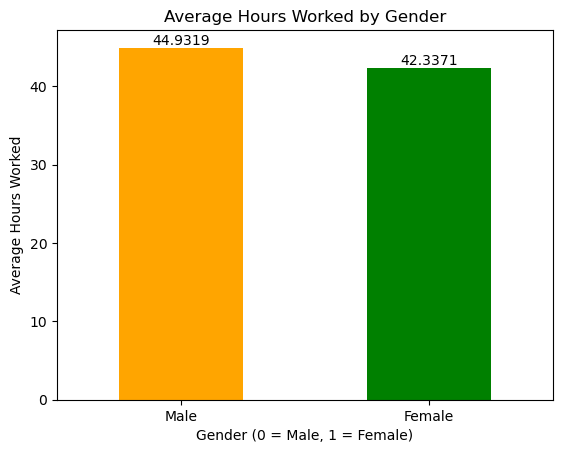

In [17]:
# Calculate average hours worked by gender
avg_hours_by_gender = data.groupby('female')['hours'].mean()

# Plot the bar chart
avg_hours_by_gender.plot(kind='bar', color=['orange', 'green'], legend=False)
plt.title('Average Hours Worked by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Average Hours Worked')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

Notice that, based on the graph, it appears males have on average higher working hours than women. 

We need to formalize this with a test.

$$H_0: \mu_m = \mu_f$$
$$H_a: \mu_m \neq \mu_f$$

Our null hypothesis states that the average hours worked by males $\mu_m$ is equal to the average number of hours worked by females $\mu_f$.

In [18]:
from scipy.stats import ttest_ind

# Separate hours worked by gender
male_hours = data[data['female'] == 0]['hours']
female_hours = data[data['female'] == 1]['hours']

# Perform two-sample t-test
t_stat, p_value = ttest_ind(male_hours, female_hours, equal_var=False)

# Display the results
print(f"t-statistic: {t_stat}")
print(f"p-value: {p_value}")

t-statistic: 39.78489011605316
p-value: 0.0


Since the $p$-value is very low and the $t$-stat is very high, we reject the null hypothesis that the average hours worked between male and female is the same. 

As such, we have evidence to believe that there is some difference in the average hours. **What about income?**

In [19]:
# Separate earnings by gender
male_earnings = data[data['female'] == 0]['earnings']
female_earnings = data[data['female'] == 1]['earnings']

# Perform two-sample t-test
t_stat_earnings, p_value_earnings = ttest_ind(male_earnings, female_earnings, equal_var=False)

# Display the results
print(f"t-statistic (Earnings): {t_stat_earnings}")
print(f"p-value (Earnings): {p_value_earnings}")

t-statistic (Earnings): 43.9266197324469
p-value (Earnings): 0.0


We see an even more higher $t$-stat of the null hypothesis in this case. Graphing the data will backup the result

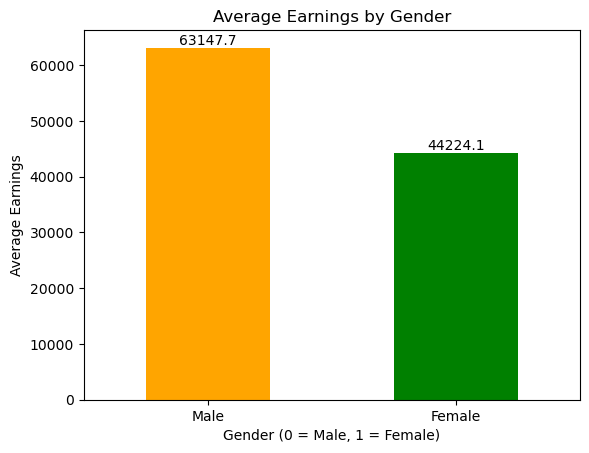

In [20]:
# Calculate average earnings by gender
avg_earnings_by_gender = data.groupby('female')['earnings'].mean()

# Plot the bar chart
avg_earnings_by_gender.plot(kind='bar', color=['orange', 'green'], legend=False)
plt.title('Average Earnings by Gender')
plt.xlabel('Gender (0 = Male, 1 = Female)')
plt.ylabel('Average Earnings')
plt.xticks(ticks=[0, 1], labels=['Male', 'Female'], rotation=0)
plt.bar_label(plt.gca().containers[0])
plt.show()

## Step 4. Implementing two-sample proportion tests

Suppose I want to look at the proportion of people who work more than 40 hours a week. Let's called these people _overworked_ (i.e. stressed).

In [21]:
# Create a new variable 'over' indicating if hours > 40
data['overworked'] = (data['hours'] > 40).astype(int)
data[['hours', 'overworked']].head()

,hours,overworked
0,45,1
1,45,1
2,40,0
3,40,0
4,50,1


We can compare the proportion of males who are overworked $p_m$ versus the proportion of females $p_f$ that are overworked. 

Suppose let's state an initial claim that the proportion of males and females that are overworked are the same. 

Hence, we can form the hypothesis below

$$H_0: p_m = p_f$$
$$H_a: p_m \neq p_f$$

Analogously, this is equivalent to 

$$H_0: p_m - p_f = 0$$
$$H_a: p_m - p_f \neq 0$$

To better visualize this, we can generate a frequency table.

In [22]:
# Generate a frequency table for 'overworked' and 'female' with row and column sums
frequency_table_with_totals = pd.crosstab(data['overworked'], data['female'], rownames=['Overworked'], colnames=['Female'], margins=True)
print(frequency_table_with_totals)

Female          0      1    All
Overworked                     
0           17938  16722  34660
1           11202   4880  16082
All         29140  21602  50742


From here, we can calculate the proportions.

In [23]:
# Generate a table with proportions for 'overworked' and 'female'
proportion_table = frequency_table_with_totals.div(frequency_table_with_totals.loc['All', :], axis=1)
print(proportion_table)

Female            0         1       All
Overworked                             
0           0.61558  0.774095  0.683063
1           0.38442  0.225905  0.316937
All         1.00000  1.000000  1.000000


Clearly, 38.4% of males are overworked while only 22.6% of females are overworked.

To test if the difference is statistically significant, we can do a test of **two-sample proportions**.

In [24]:
from statsmodels.stats.proportion import proportions_ztest

# Extract counts of overworked males and females
count = [frequency_table_with_totals.loc[1, 0], frequency_table_with_totals.loc[1, 1]]

# Extract total counts of males and females
nobs = [frequency_table_with_totals.loc['All', 0], frequency_table_with_totals.loc['All', 1]]
print(count)
print(nobs)

# Perform the two-sample proportion z-test
z_stat, p_value = proportions_ztest(count, nobs)

# Display the results
print(f"z-statistic: {z_stat}")
print(f"p-value: {p_value}")

[11202, 4880]
[29140, 21602]
z-statistic: 37.94562327861474
p-value: 0.0


Since the $p$-value is very low and the $z$-stat is very high, we reject the null hypothesis that the proportions are equal.

We conclude that there is sufficient evidence to show that the proportion of males overworked is statistically different that the proportion of females overworked.

## Step 4. Implementing a chi-squared test

The example above deals with explicitly two possible options (female or male). 

Now suppose you wanted to compare the "overworked" variable across region. 

Note that, based on the codebook, we have 4 possible regions. Northwest, Midwest, South, and West 

In [25]:
# Recode the 'region' variable
data['region'] = data['region'].replace({1: 'Northwest', 2: 'Midwest', 3: 'South', 4: 'West'})

From here, let us generate another frequency table.

In [26]:
frequency_table_region = pd.crosstab(data['region'], data['overworked'], rownames=['Region'], colnames=['Overworked'])
frequency_table_region['All'] = frequency_table_region.sum(axis=1)
print(frequency_table_region)

Overworked      0     1    All
Region                        
Midwest      7950  4075  12025
Northwest    6356  3343   9699
South       11346  4738  16084
West         9008  3926  12934


As before, from here, we can compute the proportions.

In [27]:
# Generate a frequency table of proportions for 'region' and 'overworked'
proportion_table_region = frequency_table_region.div(frequency_table_region['All'], axis=0)
print(proportion_table_region)

Overworked         0         1  All
Region                             
Midwest     0.661123  0.338877  1.0
Northwest   0.655325  0.344675  1.0
South       0.705422  0.294578  1.0
West        0.696459  0.303541  1.0


It appears that the South (29.5%) has the lowest amount of people overworked while the Northwest (34.5%) has the highest.

To test if there is a significant difference in the proportion across regions, we can use a chi-squared test.

In [28]:
from scipy.stats import chi2_contingency

# Perform Chi-squared test
chi2_stat, p_value, dof, expected = chi2_contingency(frequency_table_region.iloc[:-1, :-1])

# Display the results
print(f"chi-squared statistic: {chi2_stat}")
print(f"p-value: {p_value}")
print(f"Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

chi-squared statistic: 93.96243130473181
p-value: 3.9474559199402155e-21
Degrees of Freedom: 2
Expected Frequencies:
[[ 8158.73095641  3866.26904359]
 [ 6580.58474397  3118.41525603]
 [10912.68429962  5171.31570038]]


Here, we see that there is evidence that there is a significant difference in the proportions overworked across regions given that the $p$-value is very low and the chi-squared statsitic is very high.

In [29]:
!jupyter nbconvert --to html "Week 11. Hypothesis Testing.ipynb"

[NbConvertApp] Converting notebook Week 11. Hypothesis Testing.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 385045 bytes to Week 11. Hypothesis Testing.html
